In [1]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
import sys #sys needed only for python version
#display versions of python and packages
print('\npython version ' + sys.version)
print('pandas version ' + pd.__version__)
print('numpy version ' + np.__version__)
#show plots in notebook
%matplotlib inline

# grab saved dataset
df = pd.read_pickle('dataset.pkl')
#show the first 5 rows
print(df.sample(n=5))

/Users/cohare/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):



python version 3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version 0.19.2
numpy version 1.11.3
            username   password  username length  password length  \
2119774    d3stroy3r  p3rf0rm3r                9                9   
2516641  djoseiwbc3u     ynzh2t               11                6   
8063762  schafheimer    othello               11                7   
8607548     spiderma       king                8                4   
5030173   kiselevik3   kisel777               10                8   

        username pattern password pattern  
2119774        a0aaaaa0a        a0aa0aa0a  
2516641      aaaaaaaaa0a           aaaa0a  
8063762      aaaaaaaaaaa          aaaaaaa  
8607548         aaaaaaaa             aaaa  
5030173       aaaaaaaaa0         aaaaa000  


In [16]:
dfStrength = pd.DataFrame(columns=['strength num', 'strength rating'])
def calcStrength(pattern):
    strength = 0
    length = len(pattern)
    if length >= 12: strength += 6
    elif length >= 8: strength += 3
    elif length >= 0: strength += 1
    countTypes = numTypes(pattern)
    if countTypes >= 4: strength += 6
    elif countTypes >= 3: strength += 4
    elif countTypes >= 2: strength += 2
    elif countTypes >= 1: strength += 1
    return strength
    
def numTypes(pattern):
    types = {}
    count = 0
    for char in pattern:
        if char not in types:
            count += 1
            types[char] = 1
    return count

def strengthRating(strength):
    if strength >= 9: return 'strong'
    elif strength >= 5: return 'medium'
    elif strength >= 0: return 'poor'

i = 0
for pattern in df['password pattern']:
    strength = calcStrength(str(pattern))
    rating = strengthRating(strength)
    dfStrength.loc[i] = [strength, rating]
    i += 1
print(dfStrength.sample(n=5))

KeyboardInterrupt: 

In [20]:
dfStrength = pd.DataFrame(columns=['strength num', 'strength rating'])
def calcStrength(pattern):
    strength = 0
    length = len(pattern)
    if length >= 12: strength += 6
    elif length >= 8: strength += 3
    elif length >= 0: strength += 1
    countTypes = numTypes(pattern)
    if countTypes >= 4: strength += 6
    elif countTypes >= 3: strength += 4
    elif countTypes >= 2: strength += 2
    elif countTypes >= 1: strength += 1
    return strength
    
def numTypes(pattern):
    types = {}
    count = 0
    for char in pattern:
        if char not in types:
            count += 1
            types[char] = 1
    return count

def strengthRating(strength):
    if strength >= 9: return 'strong'
    elif strength >= 5: return 'medium'
    elif strength >= 0: return 'poor'

# i = 0
# for pattern in df['password pattern']:
#     if i == 5000 or i == 50000 or i == 500000 or i == 5000000 or i == 9000000: print('next')
#     strength = calcStrength(str(pattern))
#     rating = strengthRating(strength)
#     dfStrength.loc[i] = [strength, rating]
#     i += 1
# print(dfStrength.sample(n=5))
# Temp using 50000 randoms
import random
index = 0
rands = random.sample(range(1, len(df['password pattern'])), 50000)
for i in rands:
    #if i == 5000 or i == 50000 or i == 500000 or i == 5000000 or i == 9000000: print('next')
    strength = calcStrength(str(df['password pattern'][i]))
    rating = strengthRating(strength)
    dfStrength.loc[index] = [strength, rating]
    index += 1
print(dfStrength.sample(n=5))

       strength num strength rating
392             5.0          medium
32691           4.0            poor
30442           2.0            poor
36951           8.0          medium
4717            3.0            poor


poor      35813
medium    13659
strong      528
Name: strength rating, dtype: int64


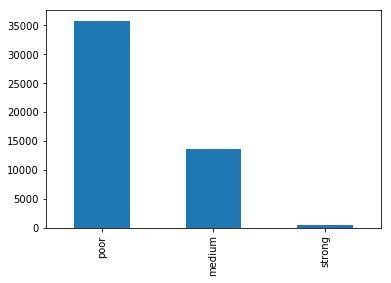

In [24]:
wordStrength_counts = dfStrength['strength rating'].value_counts()
print(wordStrength_counts.nlargest(3))
# plot 5 strength rating frequencies
wordStrength_counts.nlargest(3).plot(kind='bar')

2.0     18193
4.0     11109
5.0      9555
3.0      6511
7.0      2650
8.0      1454
10.0      471
9.0        35
12.0       22
Name: strength num, dtype: int64


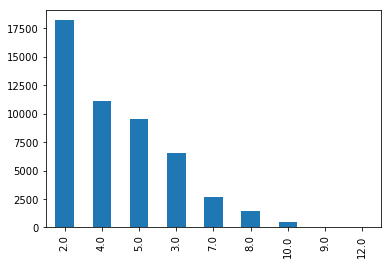

In [25]:
wordStrengthNum_counts = dfStrength['strength num'].value_counts()
print(wordStrengthNum_counts.nlargest(9))
# plot 12 strength num frequencies
wordStrengthNum_counts.nlargest(9).plot(kind='bar')